<a href="https://colab.research.google.com/github/Zhipeng98/Statistics-of-Covid19/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

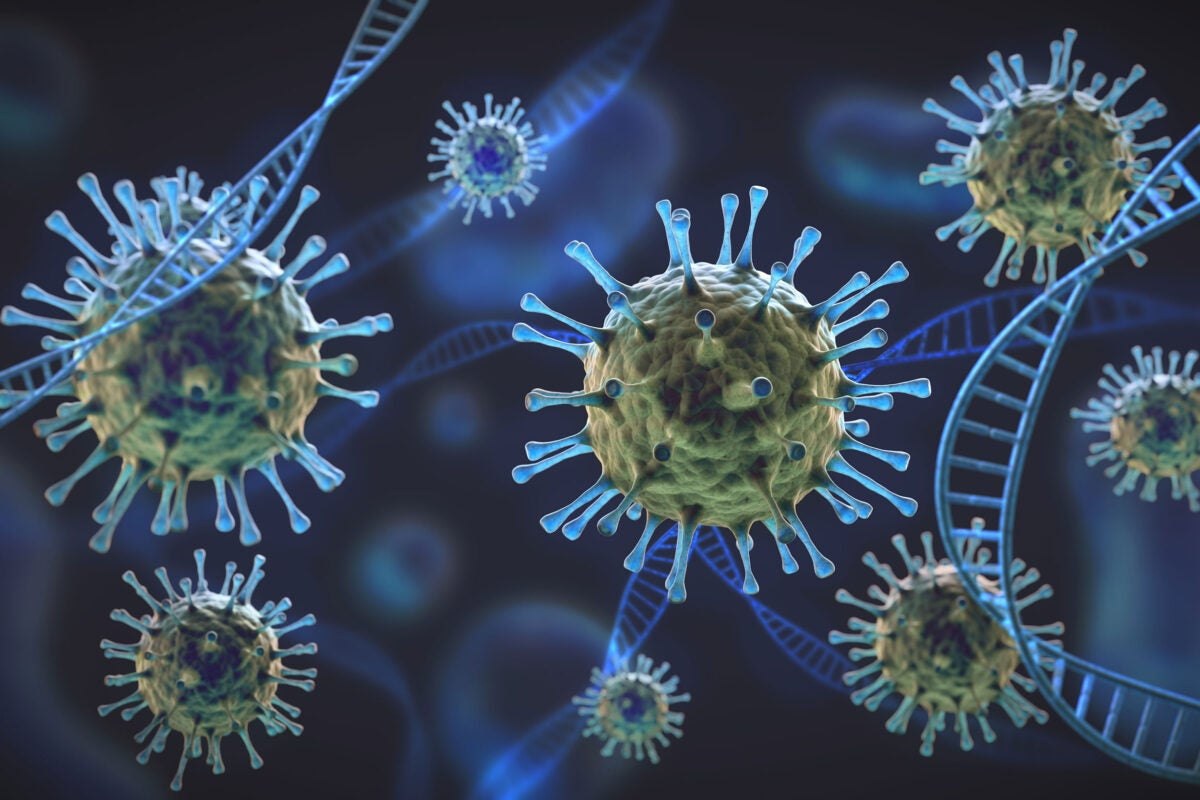

# Title:
Statistics and trend prediction of COVID-19 cases in NYC




# Theme: 
Covid-19,Health

# Abstract

In this Project, It uses the version of python is python 3. For the libraries, It uses the pandas to do data clean, datetime library for transforming the date, and matplotlib to make the data visualization. In addition, using linear regression model predicts the trend of COVID-19 cases in future. For the result, it will show the graphs of the statistics of the COVID-19 cases in NYC, and the graph of prediction.It will show the peak , average value of the cases. In the graph of the prediction, it will show the trend of the cases by linear function in future. 

# Relevance:

It is important to analyze and predict COVID-19 cases which are related to all of us. According to analysis the number of inflected people, death cases and prediction, it will help us figure out the efficiency of the vaccine, the effectiveness of the control and the trend of COVID-19.    

#Data Sources:

Here is the data source of the COVID-19 data: https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3/data.

The link for tutorials about pandas datetime column to ordinal:https://www.py4u.net/discuss/152295 

# Data Analysis and Visualization

Here is the libraries used in the project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

Data clean

In [ ]:
Data=pd.read_csv("covid19.csv")
Data=Data.drop([0])
Data=Data[["DATE_OF_INTEREST","CASE_COUNT","DEATH_COUNT","CASE_COUNT_7DAY_AVG","DEATH_COUNT_7DAY_AVG"]]
date=pd.to_datetime(Data["DATE_OF_INTEREST"])
case=Data[["CASE_COUNT"]]#data of  CASE_COUNT
death=Data[["DEATH_COUNT"]]#data of DEATH_COUNT
case_7_day_avg=Data["CASE_COUNT_7DAY_AVG"]#data of CASE_COUNT_7DAY_AVG
death_7_day_avg=Data["DEATH_COUNT_7DAY_AVG"]#data of DEATH_COUNT_7DAY_AVG

# Number of infection Vs. Date

Find maximum, minimum and average number of cases

In [ ]:
case_max_infections=Data["CASE_COUNT"].max()# Maximum case_count per day
case_min_infections=Data["CASE_COUNT"].min()# Minimum case_count per day
avg_case=Data["CASE_COUNT"].mean() # Average case_count per day

plot the diagram of Number of infections Vs. Date

In [ ]:
plt.figure(figsize=(12,12)) #set the size of the figure
plt.xlabel("Date")#set label of x axis
plt.ylabel("Number of infections")#set label of y axis
plt.title("The cases of COVID-19 in NYC ")#set the title of the diagram
plt.xticks(rotation=45)#rotate the xticks by 45 degrees
plt.plot(date,case)#plot the graph
plt.show() #show the graph

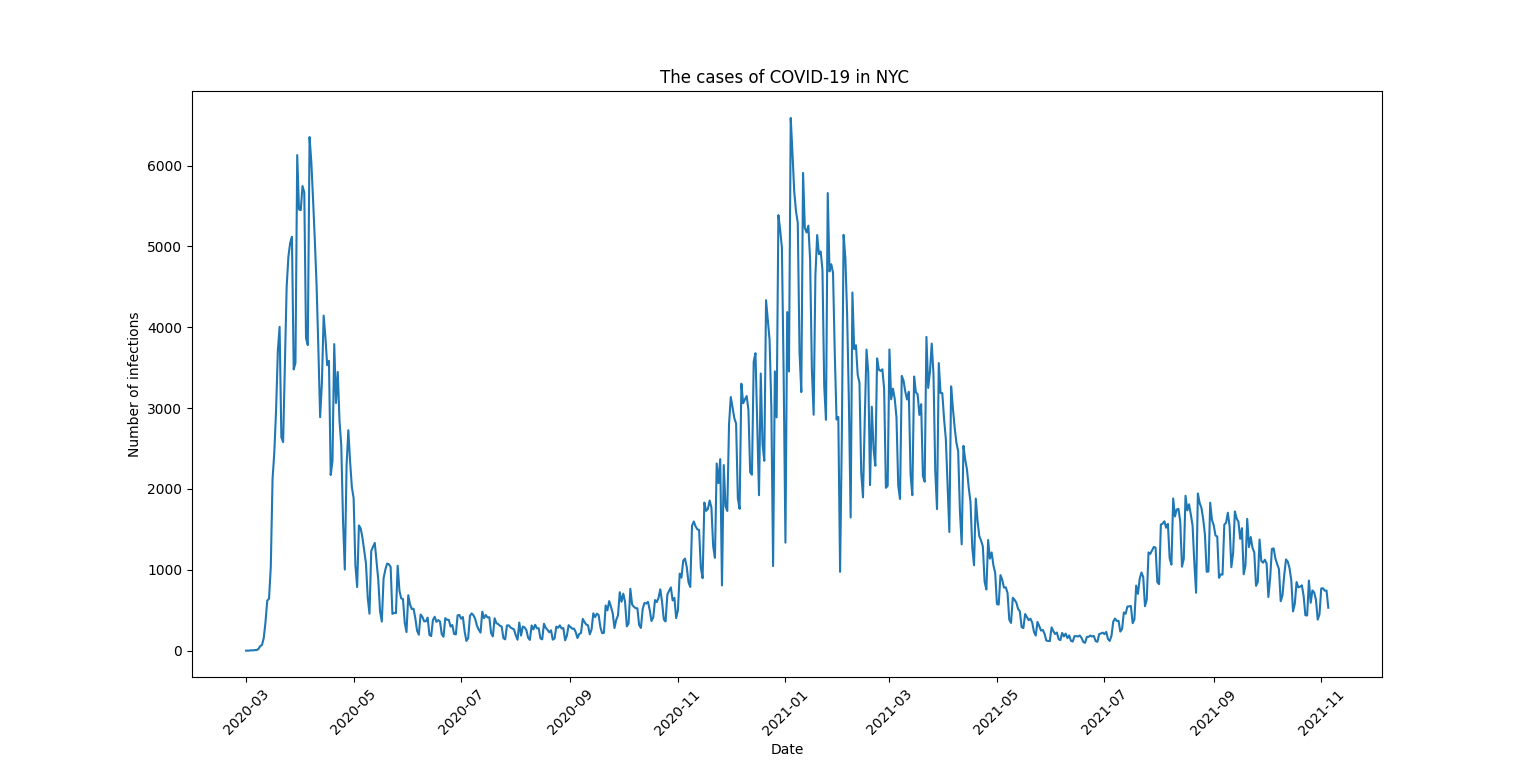

**Reasult**: The graph shows the trend and number of the infection, the independent variable is the Date, and the dependent variable is Number of infections. According to analyze the data of the infected cases, the maximum number of the infections per day is 6589 people, and the minimum number is 0 case. The average of the number of infections is 1499 people per day. From the graph, it shows that the number of infected is increasing quickly at the beginning of 2020. Between January and February 2021, the number of infections reached its maximum per day.After February 2021, the infection cases were decreasing because people began to vaccinate.

# CASE_COUNT_7DAY_AVG Vs. Date

Find maximum, minimum number of 7_day cases average

In [ ]:
case_7_day_avg_max=Data["CASE_COUNT_7DAY_AVG"].max()
case_7_day_avg_min=Data["CASE_COUNT_7DAY_AVG"].min()
print("7days case avg max and min: ")
print(case_7_day_avg_max,case_7_day_avg_min)

plot the diagram of CASE_COUNT_7DAY_AVG Vs. Date

In [ ]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("CASE_COUNT_7DAY_AVG")
plt.title("The 7_day  average death in NYC ")
plt.xticks(rotation=45)
plt.plot(date,case_7_day_avg)
plt.show()

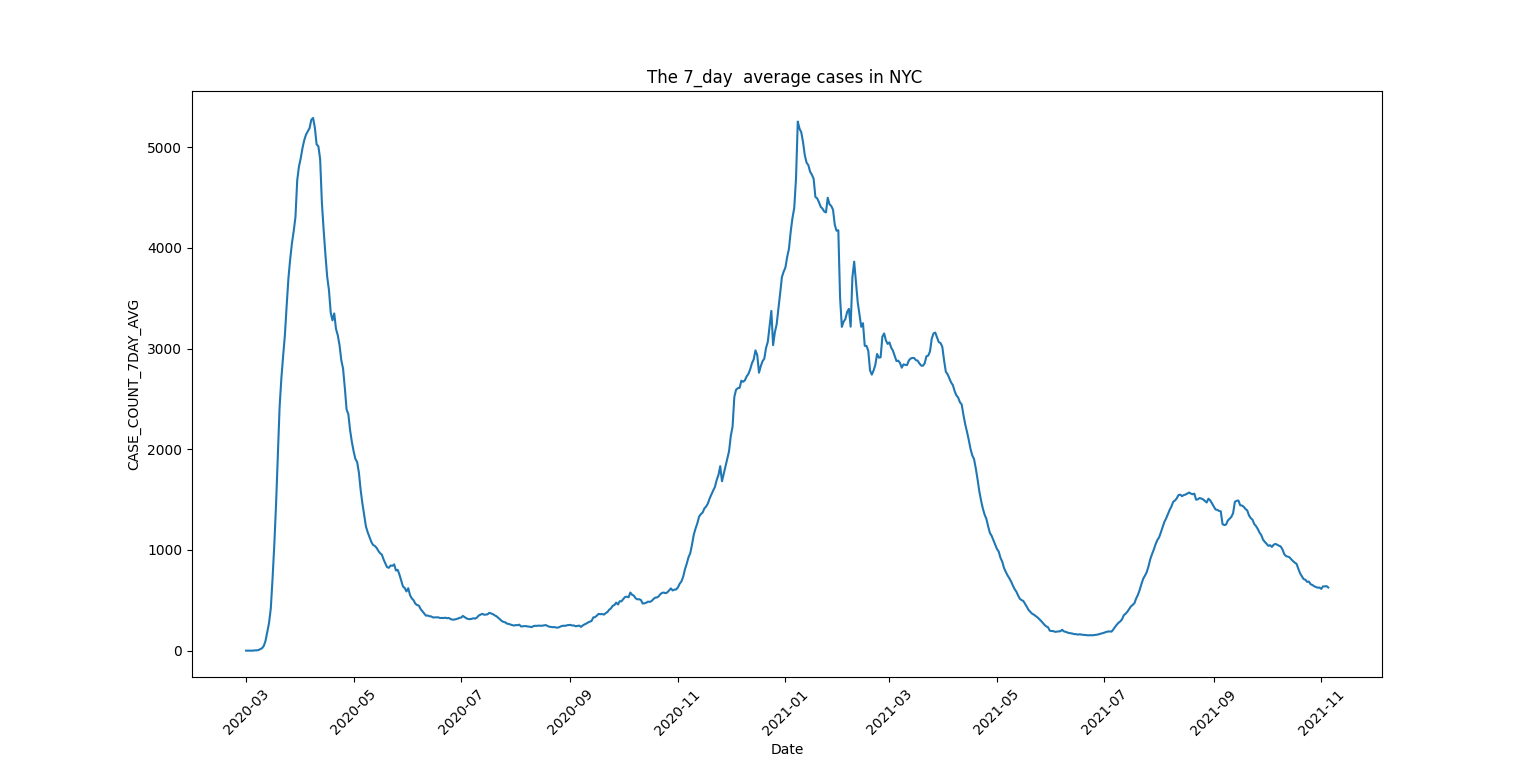

**Reasult**: The maximum value of 7_day case average is 5290, and the minimum value is 0. From the 7_day average is increasing rapidly in 3/2020,4/2020,11/2020 and 12/2020. After 1/2021, the 7_day case average is decreasing rapidly becasue people wore their masks and vaccinated

# Number of death Vs. Date

plot the diagram of Number of death Vs. Date

In [ ]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("Number of death")
plt.title("The death cases of COVID-19 in NYC ")
plt.xticks(rotation=45)
plt.plot(date,death)
plt.show()

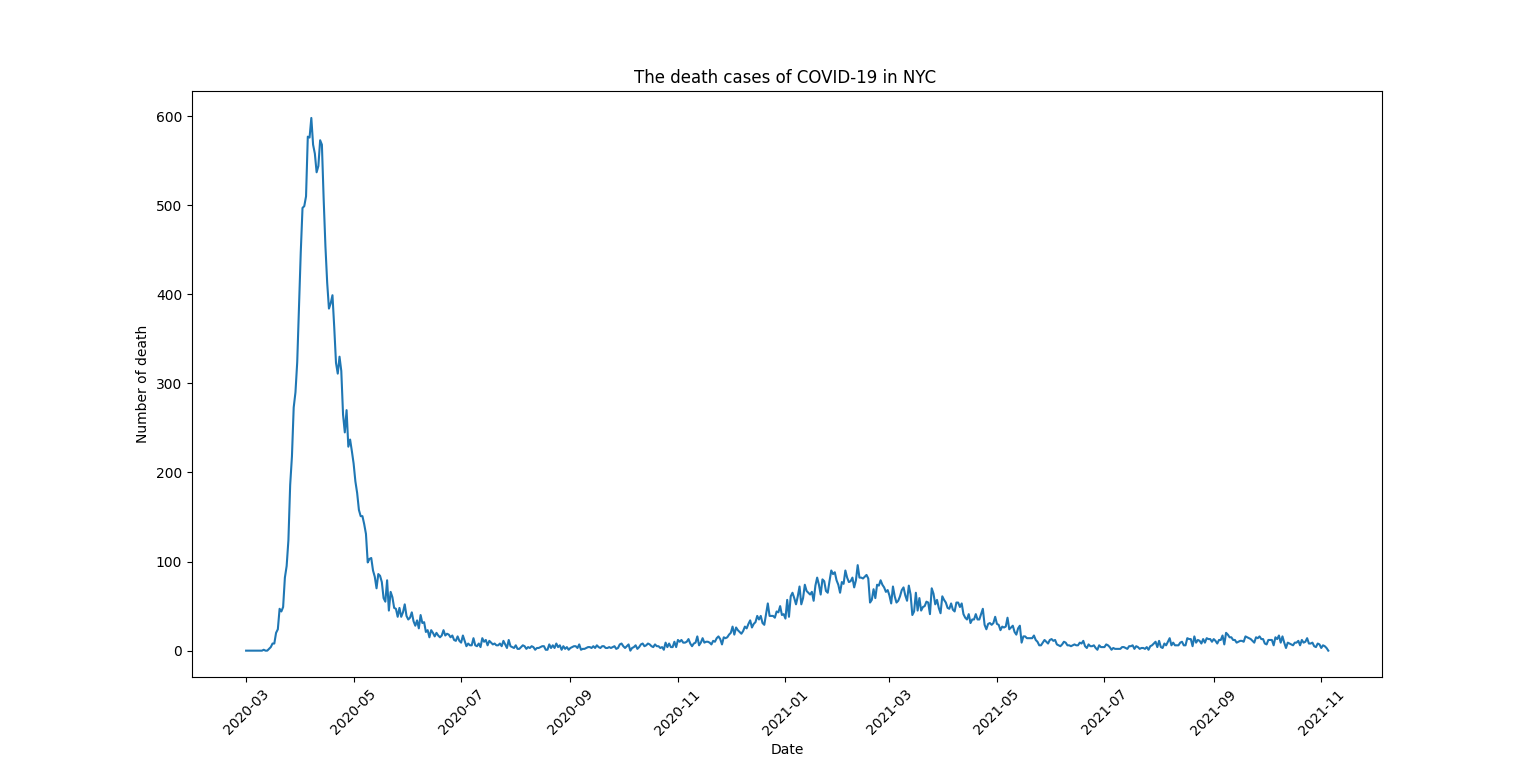

**Reasult**: This graph shows the trend of the death cases per day. According to the analysis, the maximum of the death number perday is 598 people in NYC,and the minimum number of death is 0 people per day. The average of the death number per day is 48 people per day. According to the graph , it shows that after April 2020, the death number is decreasing because people were aware the danger of Covid-19, and they wore masks and vaccinated.

# DEATH_COUNT_7DAY_AVG Vs. Date

Find maximum, minimum of 7_day death cases average

In [ ]:
death_7_day_avg_max=Data["DEATH_COUNT_7DAY_AVG"].max()
death_7_day_avg_min=Data["DEATH_COUNT_7DAY_AVG"].min()
print("7days death case avg max and min: ")
print(death_7_day_avg_max,death_7_day_avg_min)

plot the diagram of DEATH_COUNT_7DAY_AVG Vs. Date

In [ ]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("DEATH_COUNT_7DAY_AVG")
plt.title("The 7_day  average death in NYC ")
plt.xticks(rotation=45)
plt.plot(date,_7_day)
plt.show()

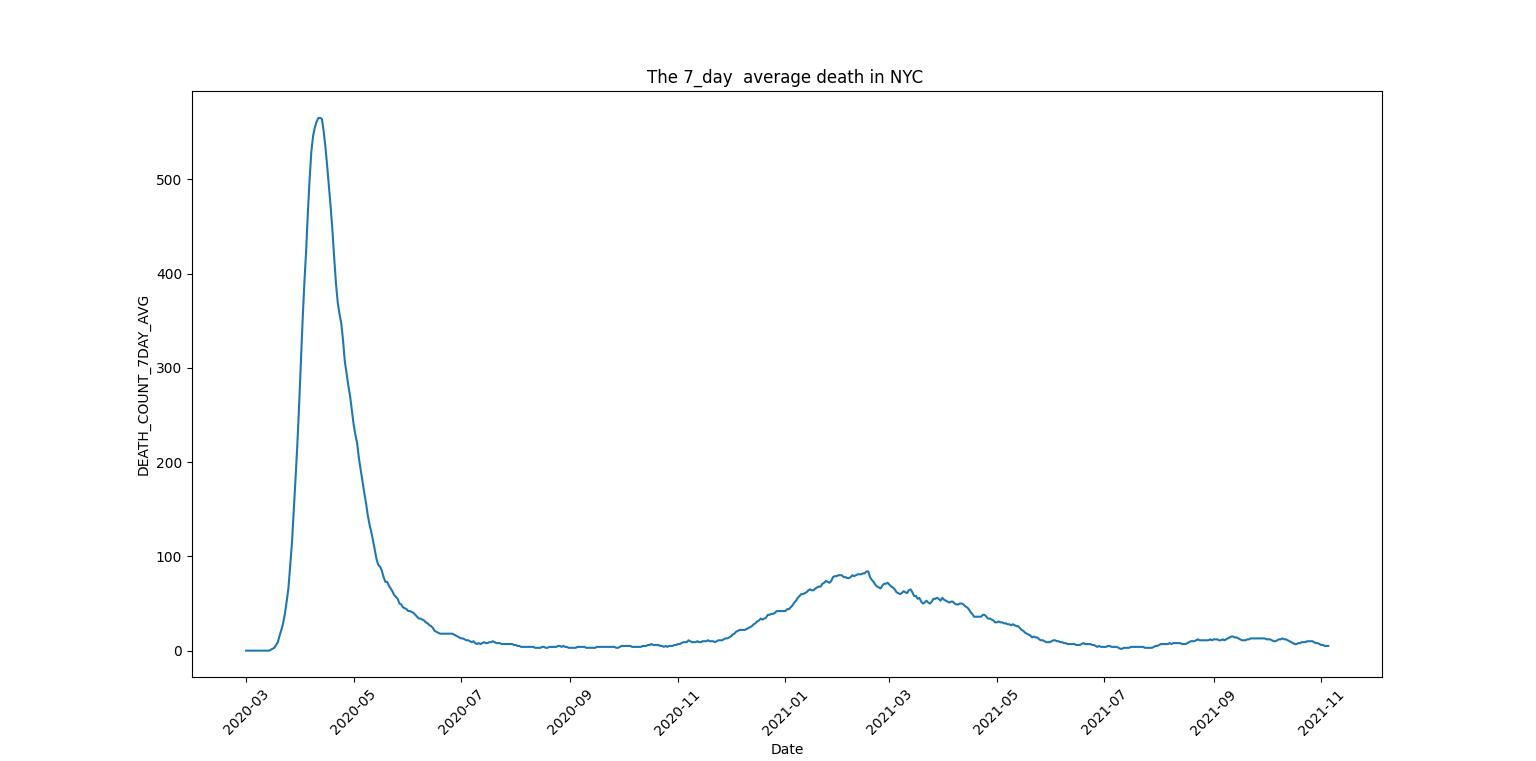

**Reasult**: The maximum value of 7_day death case average is565, and the minimum value is 0. From the 7_day death average is increasing rapidly between  3/2020 and 4/2020. The 7_day death case average is decreasing rapidly after 5/2020 becasue people wore their masks and vaccinated

# Prediction:

# Cases trend in future

Using the linear regression model to predict the trend of Covid-19 case

In [ ]:
#Transform the Date to the proleptic Gregorian ordinal of the date for prediction
Data["DATE_OF_INTEREST"]=Data["DATE_OF_INTEREST"].map(dt.datetime.toordinal)
#Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(Data[["DATE_OF_INTEREST"]], case, test_size=0.7, random_state=42)
#set linear regression model
model=LinearRegression()
#Fit it on X_train and y_train
model=model.fit(X_train,y_train)
plt.figure(figsize=(12,12))
plt.scatter(X_train,y_train)#plot a diagram by a dot
y_pre=model.predict(X_test)#Get the predicted value by X_test
print(model.coef_,model.intercept_)#get the coefficient and the intercept of the linear function
plt.plot(X_test,y_pre,color="red")#plot this linear function predicted 
plt.xlabel("Transformed Date")
plt.ylabel("prediction of infection number")
plt.title("Prediction of the case_count in future")
plt.show()

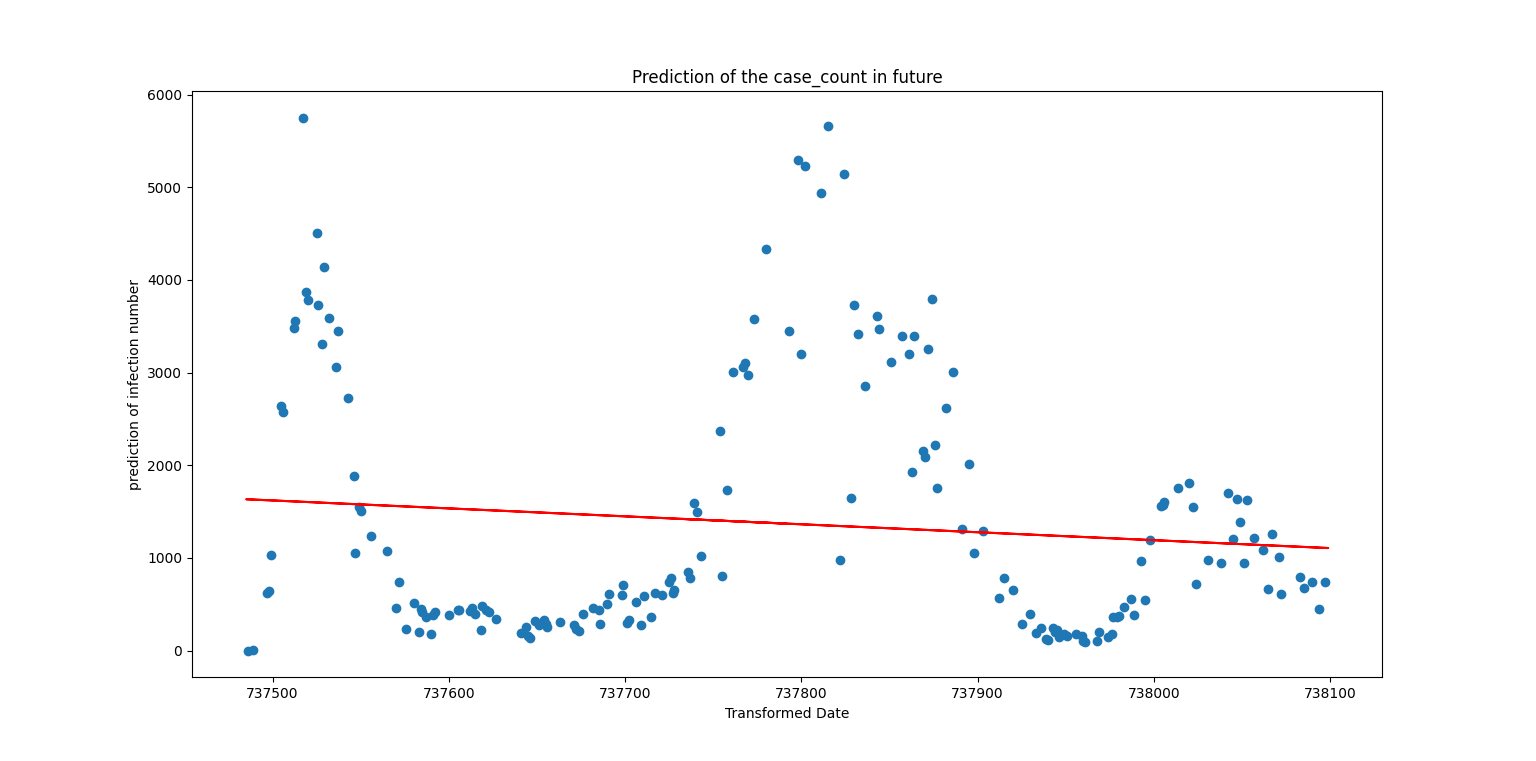

**Resault**:For the case_count prediction, I use linear regression model to predict the trending of the case count in future. According to the train_test data, the cofficient is -0.857, and the intercept is 633865. The linear function is : y=-0.875x+633865. x is the date which is transformed to the proleptic Gregorian ordinal of the date. According to the predicted data and function, it shows that the case count of infections will decrease in future.

# Death cases trend in future

Using the linear regression model to predict the trend of death 

In [ ]:
#Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(Data[["DATE_OF_INTEREST"]], death, test_size=0.7, random_state=42)
#set linear regression model
model=LinearRegression()
#Fit it on X_train and y_train
model=model.fit(X_train,y_train)
plt.figure(figsize=(12,12))#set the size of the figure
plt.scatter(X_train,y_train)#plot a diagram by a dot
y_pre=model.predict(X_test)#Get the predicted value by X_test
print(model.coef_,model.intercept_)#get the coefficient and the intercept of the linear function
plt.plot(X_test,y_pre,color="red")#plot this linear function predicted 
plt.xlabel("Transformed Date")#set the x label
plt.ylabel("prediction of death_count per day")#set y label
plt.title("Prediction of the death_count per day in future")#set title
plt.show()#show the diagram


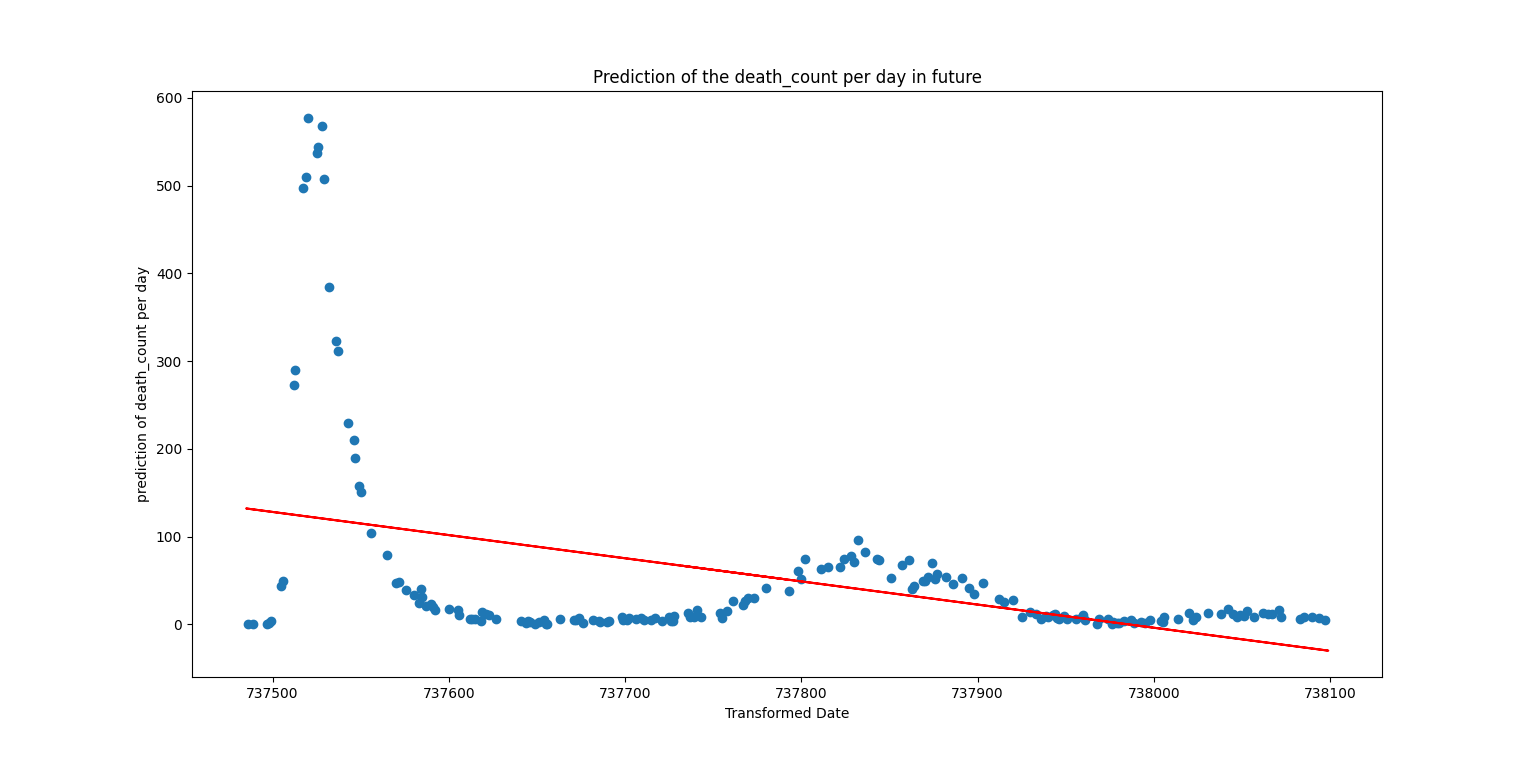

**Reasult**: For death_count prediction, I use linear regression mode to predict the death number per day in the future.By the train_test data, the cofficient is -0.264, and the intercept is 194693. The linear function is : y=--0.264x+194693. x is the date which is transformed to the proleptic Gregorian ordinal of the date. According to the graph, it shows that the death counts are decreasing rapidly in future.

# Conclusion

According to analyze the data of the infected cases, the maximum number of the infections per day is 6589 people, and the minimum number is 0 case. The average of the number of infections is 1499 people per day. The graph: Number of infections Vs. Date shows 3/2020 to 4/2020 and 11/2020 to 1/2020 are increasing rapidly.However, after 2/2020, the infected cases are increasing slowly and decreasing after 4/2021.  The graph : CASE_COUNT_7DAY_AVG Vs. Date shows that the 7_day average is increasing rapidly in 3/2020,4/2020,11/2020 and 12/2020. After 1/2021, the 7_day case average is decreasing rapidly. Graph:Number of death Vs. Date shows that the max death value is 598 per day, min value is 0 and the average value is 48 per day. After 4/2020 , the death cases are decreasing rapidly. Graph:DEATH_COUNT_7DAY_AVG Vs. Date shows the 7_day death average is increasing rapidly between 3/2020 and 4/2020. The 7_day death case average is decreasing rapidly after 5/2020.
According to predict the trend of the infected cases and death case, it shows that the case counts of infections will decrease steadily , and the case counts of death will decrease sharply. It is because people are aware of the danger of COVID-19, and they wear their masks. The most important is that more and more people are vaccinating in future. Therefore, in the future , infection cases and death cases number will decrease.

# Work Cited

Van Rossum, G., & Drake, F. L. (2009). Python 3.Retrived from http://www.python.org

DoITT NYC Gov Lab & Studio(2017). Retrived from https://opendata.cityofnewyork.us/

Department of Health and Mental Hygiene (5/19/2020).Retrived from https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3/data

tutorials Py4u.net.Retrived from https://www.py4u.net/discuss/152295



